In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [136]:
data= pd.read_csv('Travel.csv')
data['Gender'] = data['Gender'].replace('Fe Male', 'Female')
df = data.copy()
pd.set_option('display.max_row',df.shape[0])
pd.set_option('display.max_column',df.shape[1]) 
df.head(10)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
5,200005,0,32.0,Company Invited,1,8.0,Salaried,Male,3,3.0,Basic,3.0,Single,1.0,0,5,1,1.0,Executive,18068.0
6,200006,0,59.0,Self Enquiry,1,9.0,Small Business,Female,2,2.0,Basic,5.0,Divorced,5.0,1,2,1,1.0,Executive,17670.0
7,200007,0,30.0,Self Enquiry,1,30.0,Salaried,Male,3,3.0,Basic,3.0,Married,2.0,0,2,0,1.0,Executive,17693.0
8,200008,0,38.0,Company Invited,1,29.0,Salaried,Male,2,4.0,Standard,3.0,Unmarried,1.0,0,3,0,0.0,Senior Manager,24526.0
9,200009,0,36.0,Self Enquiry,1,33.0,Small Business,Male,3,3.0,Deluxe,3.0,Divorced,7.0,0,3,1,0.0,Manager,20237.0


In [102]:
print('There is' , df.shape[0] , 'rows')
print('There is' , df.shape[1] , 'columns')

There is 4888 rows
There is 20 columns


In [103]:
print('There are' , df.duplicated().sum() , 'duplicates')
df.loc[df.duplicated(keep=False),:]
df.drop_duplicates(keep='first',inplace=True)
print('There is now' , df.shape[0] , 'rows')
print('There is now' , df.shape[1] , 'columns')

There are 0 duplicates
There is now 4888 rows
There is now 20 columns


In [104]:
df.describe()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
count,4888.000000,4888.000000,4662.000000,4888.000000,4637.000000,4888.000000,4843.000000,4862.000000,4748.000000,4888.000000,4888.000000,4888.000000,4822.000000,4655.000000
mean,202443.500000,0.188216,37.622265,1.654255,15.490835,2.905074,3.708445,3.581037,3.236521,0.290917,3.078151,0.620295,1.187267,23619.853491
std,1411.188388,0.390925,9.316387,0.916583,8.519643,0.724891,1.002509,0.798009,1.849019,0.454232,1.365792,0.485363,0.857861,5380.698361
min,200000.000000,0.000000,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1000.000000
25%,201221.750000,0.000000,31.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,20346.000000
50%,202443.500000,0.000000,36.000000,1.000000,13.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,22347.000000
75%,203665.250000,0.000000,44.000000,3.000000,20.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,25571.000000
max,204887.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,5.000000,1.000000,3.000000,98678.000000


In [105]:
target = pd.DataFrame()
target['ProdTaken'] = df['ProdTaken'].map({0:'Not Taken',1:'Taken'})
target=target.dropna()
df = df.drop(['CustomerID','ProdTaken'],axis=1)
df = df.dropna()
df.head()

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
5,32.0,Company Invited,1,8.0,Salaried,Male,3,3.0,Basic,3.0,Single,1.0,0,5,1,1.0,Executive,18068.0


Categorical Features

In [106]:
categorical_df = pd.DataFrame()
for col in df.select_dtypes(include=['object','int64']):
    categorical_df[col] = df[col]
categorical_df['PreferredPropertyStar'] = df['PreferredPropertyStar']
for col in categorical_df:
    print(f'{col :-<50} {df[col].unique()}')

TypeofContact------------------------------------- ['Self Enquiry' 'Company Invited']
CityTier------------------------------------------ [3 1 2]
Occupation---------------------------------------- ['Salaried' 'Free Lancer' 'Small Business' 'Large Business']
Gender-------------------------------------------- ['Female' 'Male']
NumberOfPersonVisiting---------------------------- [3 2 1 4 5]
ProductPitched------------------------------------ ['Deluxe' 'Basic' 'Standard' 'Super Deluxe' 'King']
MaritalStatus------------------------------------- ['Single' 'Divorced' 'Married' 'Unmarried']
Passport------------------------------------------ [1 0]
PitchSatisfactionScore---------------------------- [2 3 5 4 1]
OwnCar-------------------------------------------- [1 0]
Designation--------------------------------------- ['Manager' 'Executive' 'Senior Manager' 'AVP' 'VP']
PreferredPropertyStar----------------------------- [3. 4. 5.]


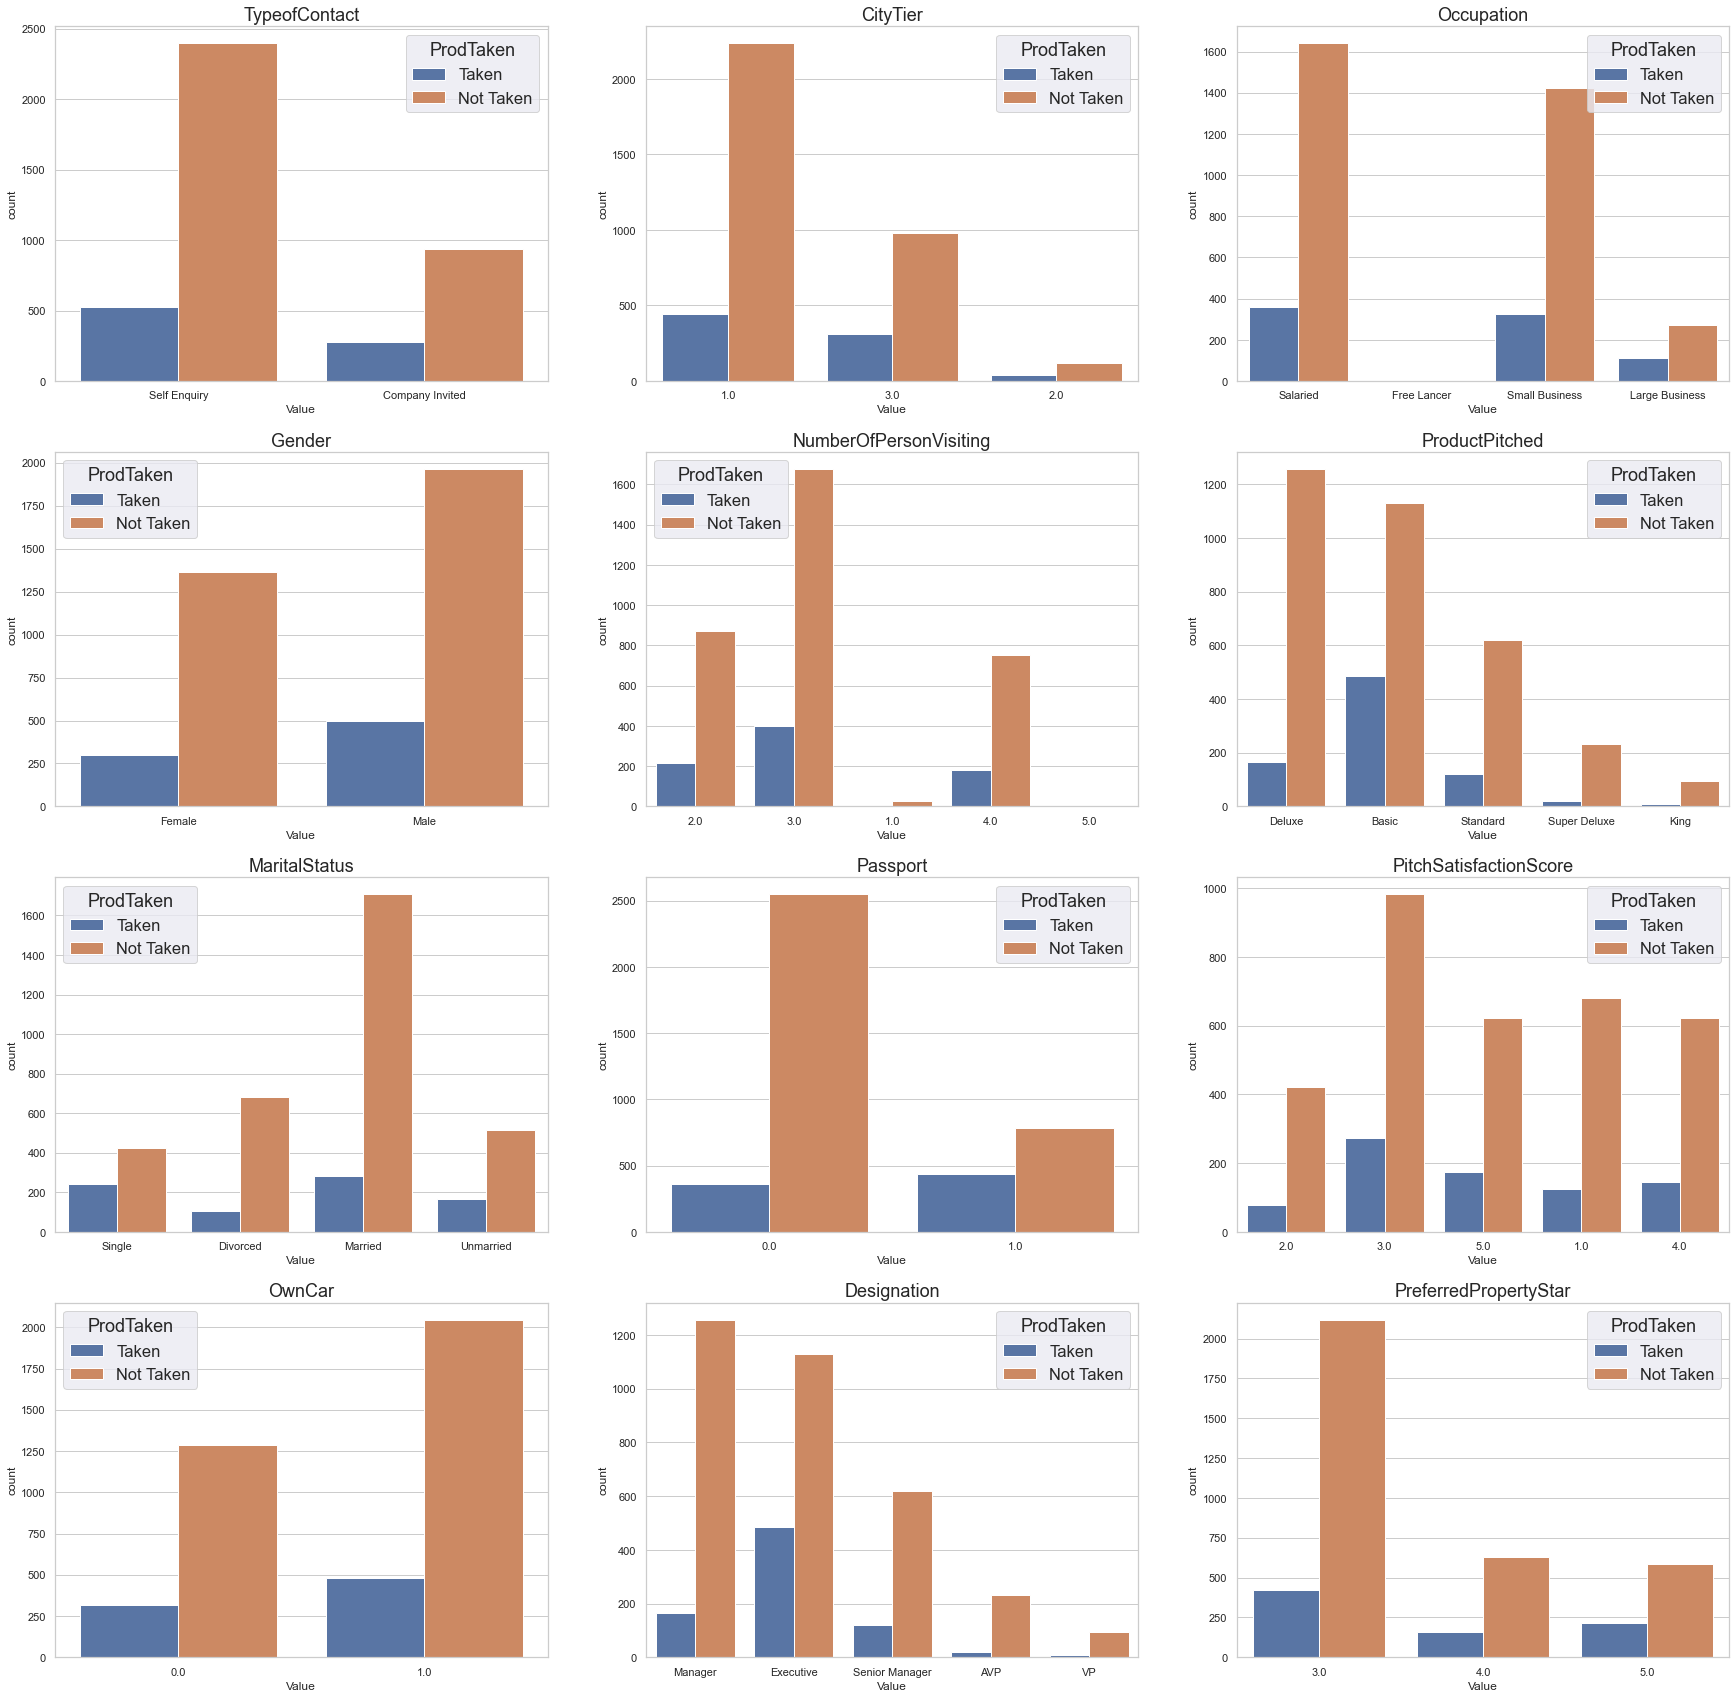

In [107]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
combined_df = pd.concat([categorical_df, target['ProdTaken']], axis=1)
melted_df = pd.melt(combined_df, id_vars=['ProdTaken'], var_name='Variable', value_name='Value')
fig, ax = plt.subplots(4, 3, figsize=(30, 30))
sns.set(font_scale=1.5)
for i, col in enumerate(categorical_df.columns):
    # Plot countplot with hue
    sns.countplot(data=melted_df[melted_df['Variable'] == col], x='Value', hue='ProdTaken', ax=ax[i//3][i%3])
    ax[i//3][i%3].set_title(col)

plt.show()


Continuous Features

In [108]:
numeric_df = df.copy()
for col in categorical_df:
    numeric_df = numeric_df.drop(col,axis=1)
numeric_df.head()

,Age,DurationOfPitch,NumberOfFollowups,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
0,41.0,6.0,3.0,1.0,0.0,20993.0
1,49.0,14.0,4.0,2.0,2.0,20130.0
2,37.0,8.0,4.0,7.0,0.0,17090.0
3,33.0,9.0,3.0,2.0,1.0,17909.0
5,32.0,8.0,3.0,1.0,1.0,18068.0


C:\Users\VIGNES~1\AppData\Local\Temp/ipykernel_11140/3912533516.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

C:\Users\VIGNES~1\AppData\Local\Temp/ipykernel_11140/3912533516.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

C:\Users\Vignesh S S\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\Vignesh S S\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\Vignesh S S\anaconda3\lib\site-packages\s

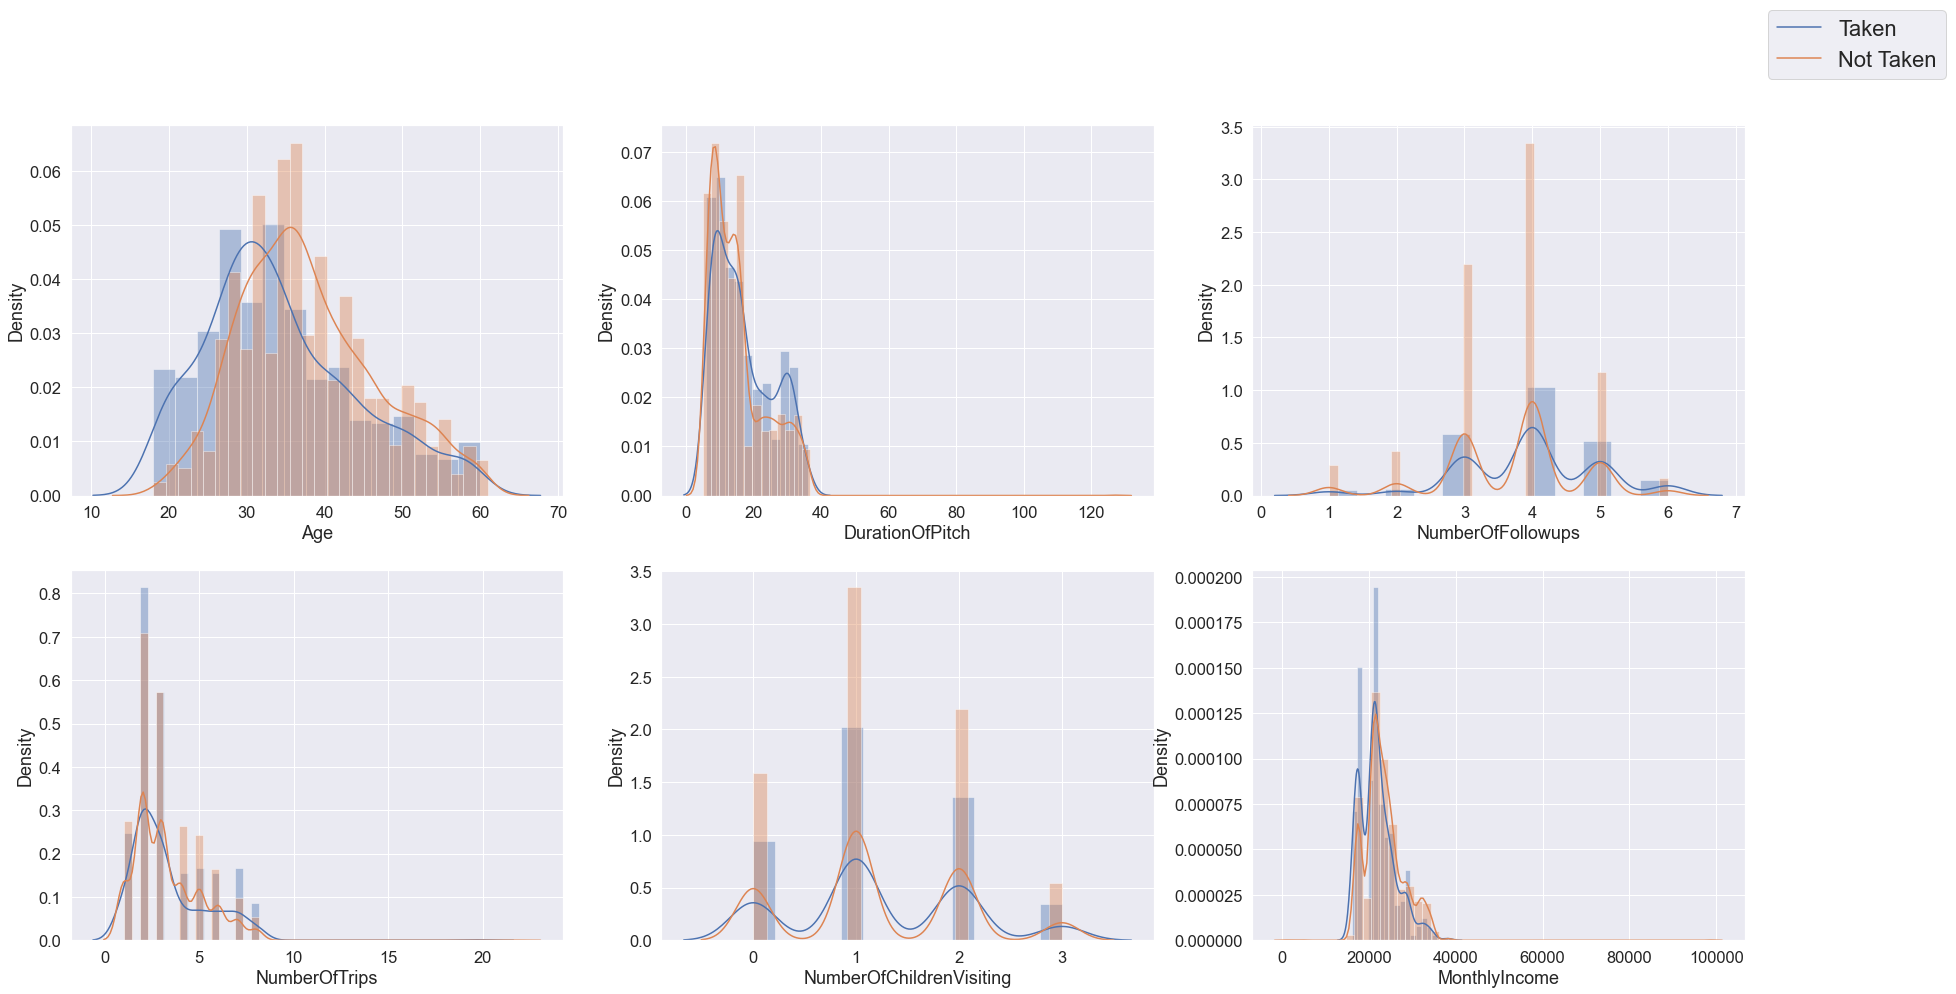

In [109]:
taken_df = numeric_df[target['ProdTaken']=="Taken"]
not_taken_df = numeric_df[target['ProdTaken']=="Not Taken"]
sns.set(font_scale = 1.5)
fig, ax = plt.subplots(2,3, figsize=(30, 15))
i=0
for col in numeric_df:
    sns.distplot(taken_df[col],label='Taken',ax=ax[i//3][i%3])
    sns.distplot(not_taken_df[col],label='Not Taken',ax=ax[i//3][i%3])
    i=i+1
fig.legend(labels=['Taken','Not Taken'],fontsize='22')
fig.show()



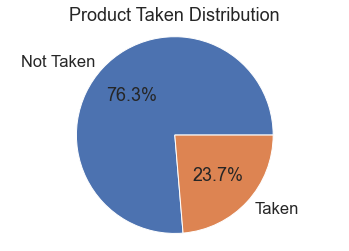

In [110]:
import matplotlib.pyplot as plt
import mplcursors

# Assuming data is your DataFrame
sizes = df1['ProdTaken'].value_counts()
labels = ['Not Taken', 'Taken']

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%0.1f%%')
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Add interactivity using mplcursors
mplcursors.cursor(hover=True)

plt.title('Product Taken Distribution')
plt.show()


In [111]:
df1 = data.copy()
#df1['ProdTaken_YN'] = df1['ProdTaken'].map({0:'Not Taken',1:'Taken'})
df1['ProdTaken_no']=df1['ProdTaken'].map({0:'not Taken',1:'Taken'})
df1.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,...,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,ProdTaken_no
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,...,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0,Taken
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,...,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0,not Taken
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,...,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0,Taken
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,...,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0,not Taken
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,...,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0,not Taken


In [112]:
df1 = df1.drop(df1[df1['ProdTaken_no'] == 'not Taken'][:1000].index)
not_taken_count = df1[df1['ProdTaken_no'] == 'not Taken'].shape[0]
not_taken_count

2968

NameError: name 'mtick' is not defined

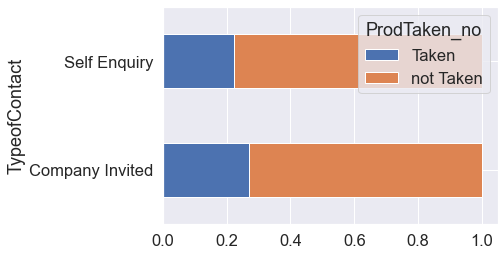

In [113]:
g = df1.groupby('TypeofContact')['ProdTaken_no'].value_counts(normalize=True).unstack('ProdTaken_no').plot(kind='barh', stacked=True)
g.xaxis.set_major_formatter(mtick.PercentFormatter(1.0))
g.set_ylabel('TypeofContact')
g.legend(loc='center', title = "ProdTaken?")

for p in g.patches:
    g.annotate(format(p.get_width(), '.2%'),
               xy = (p.get_x() + p.get_width() / 2,
                     p.get_y() + p.get_height() / 2,),
               ha = 'center',
               va = 'center',
               color = 'white'
              )

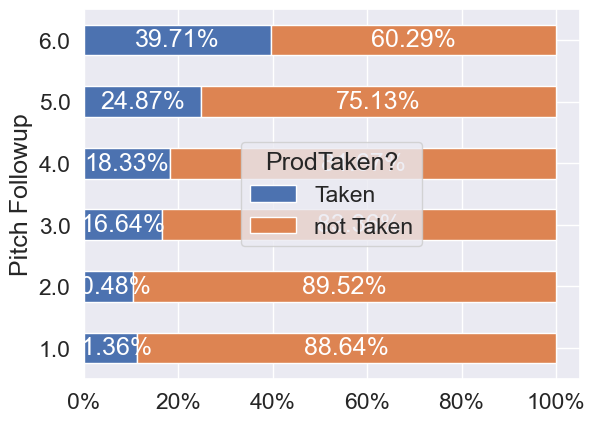

In [80]:
g = df1.groupby('NumberOfFollowups')['ProdTaken_no'].value_counts(normalize=True).unstack('ProdTaken_no').plot(kind='barh', stacked=True)
g.xaxis.set_major_formatter(mtick.PercentFormatter(1.0))
g.set_ylabel('Pitch Followup')
g.legend(loc='center', title = "ProdTaken?")

for p in g.patches:
    g.annotate(format(p.get_width(), '.2%'),
               xy = (p.get_x() + p.get_width() / 2,
                     p.get_y() + p.get_height() / 2,),
               ha = 'center',
               va = 'center',
               color = 'white'
              )

## Product Purchase Rate 

### Percentage of customers who purchased a product by gender.

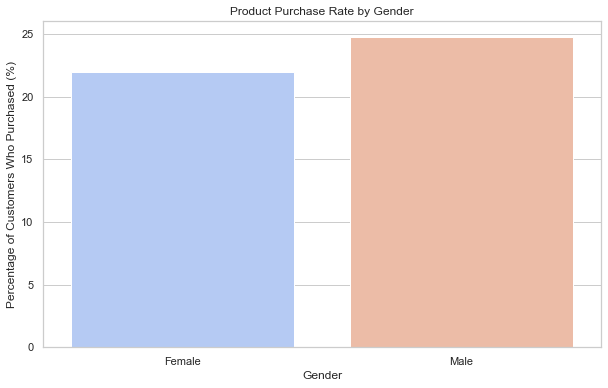

(None,
 Gender
 Female    21.965318
 Male      24.796225
 Name: ProdTaken, dtype: float64)

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting aesthetics for the plots
sns.set(style="whitegrid")

# Plotting Product Purchase Rate by Gender
plt.figure(figsize=(10, 6))
gender_purchase_rate = df1.groupby('Gender')['ProdTaken'].mean()*100
sns.barplot(x=gender_purchase_rate.index, y=gender_purchase_rate.values, palette='coolwarm')
plt.title('Product Purchase Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Percentage of Customers Who Purchased (%)')
plt.show(), gender_purchase_rate


### Plot Description:
The bar plot shows the percentage of customers who purchased a product categorized by gender. The dataset contains two gender classifications: Male, Female.

### Inference:

Male customers have the highest product purchase rate at approximately 24.79%.Female customers follow with a purchase rate of about 21.96%.



## Product purchase rate by city tier

In [115]:
import plotly.graph_objects as go
import plotly.io as pio

# Calculate purchase rate by city tier
city_tier_purchase_rate = df1.groupby('CityTier')['ProdTaken'].mean() * 100

# Create a pie chart with Plotly
fig = go.Figure(data=[go.Pie(
    labels=city_tier_purchase_rate.index,
    values=city_tier_purchase_rate.values,
    marker=dict(colors=['rgb(158,202,225)', 'rgb(181,230,29)', 'rgb(253,180,98)'])
)])

# Update layout
fig.update_layout(
    title='Product Purchase Rate by City Tier',
)

# Show the plot
pio.show(fig)


### Plot Description:
The pie chart displays the percentage of customers who purchased a product, segmented by the tier of the city they reside in. The tiers are categorized as 1, 2, and 3.



### Inference:

City Tier 1 has the lowest purchase rate at about 26.4%.
City Tiers 2 and 3 show significantly higher purchase rates at approximately 36.5% and 37.1% respectively.
This trend indicates that customers from higher city tiers (which possibly represent more urban and affluent areas) are more likely to purchase products. This could be due to higher disposable income, better exposure to marketing campaigns, or other socio-economic factors that influence consumer behavior in these regions.


## Bar Plot: Product Purchase Rate by Occupation

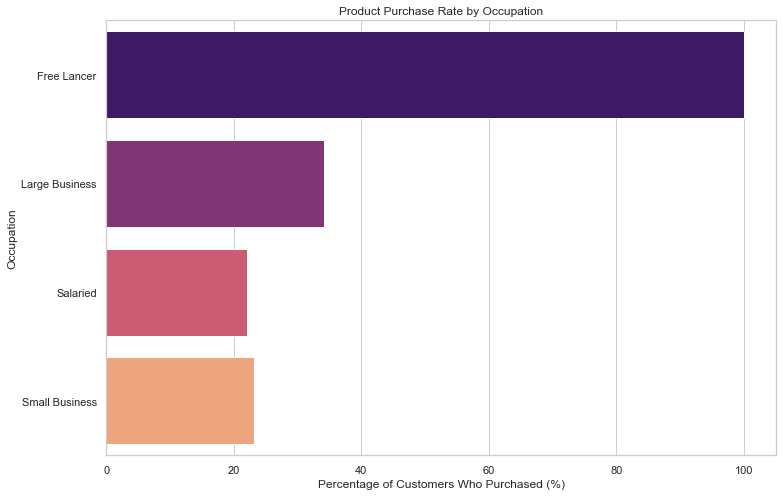

(None,
 Occupation
 Free Lancer       100.000000
 Large Business     34.090909
 Salaried           22.103577
 Small Business     23.118603
 Name: ProdTaken, dtype: float64)

In [116]:
plt.figure(figsize=(12, 8))
occupation_purchase_rate = df1.groupby('Occupation')['ProdTaken'].mean() * 100
sns.barplot(x=occupation_purchase_rate.values, y=occupation_purchase_rate.index, palette='magma')
plt.title('Product Purchase Rate by Occupation')
plt.xlabel('Percentage of Customers Who Purchased (%)')
plt.ylabel('Occupation')
plt.show(), occupation_purchase_rate

### Plot Description:
The bar plot illustrates the percentage of customers who purchased a product by occupation, including categories such as Free Lancer, Large Business, Salaried, and Small Business.

### Inference:

Free Lancers have a remarkably high purchase rate of 100%, suggesting that every Free Lancer in the dataset purchased a product. This could be due to sample size or a particular affinity for the product type among freelancers.
Large Business employees also show a high purchase rate of approximately 43.32%, potentially reflecting higher disposable income or corporate incentives.
Salaried and Small Business categories have more moderate purchase rates at about 29.97% and 31.27% respectively.
This indicates that occupation plays a significant role in product purchasing decisions, likely influenced by factors such as income level, job stability, and perhaps even lifestyle preferences associated with different job types.

## Customer Demographics 

### Distribution of customer ages.

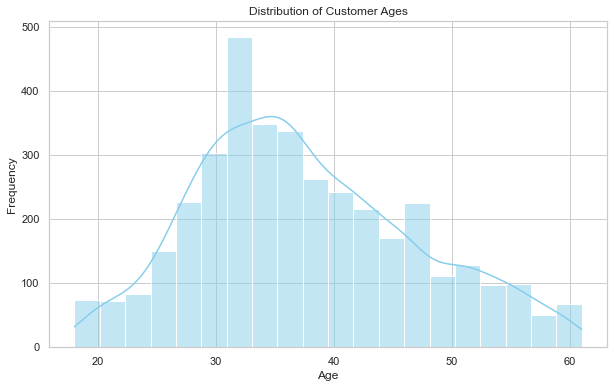

In [117]:
# Plotting the distribution of customer ages
plt.figure(figsize=(10, 6))
sns.histplot(df1['Age'].dropna(), bins=20, color='skyblue', kde=True)  # Dropping NA values for plotting
plt.title('Distribution of Customer Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

### Plot Description:
The histogram displays the frequency distribution of customer ages in the dataset. The plot includes a Kernel Density Estimate (KDE) line that shows the smoothed distribution of the data.


### Inference:

The distribution is somewhat right-skewed, indicating that the majority of the customers are in the younger age groups.
There are peaks around the ages of 30 and 50, suggesting that these age groups are particularly prominent among the customers.
The tail extending towards older ages indicates fewer older customers, but there is still a significant representation in the dataset.
This information can be useful for tailoring age-specific marketing strategies and products, as younger customers may have different travel preferences compared to older ones.


### Distribution of Monthly Incomes

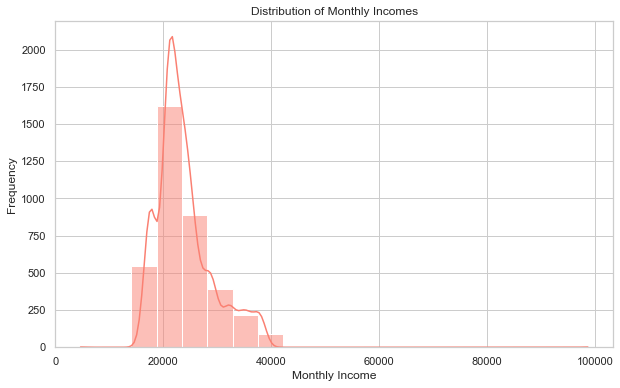

In [118]:
# Plotting the distribution of monthly incomes
plt.figure(figsize=(10, 6))
sns.histplot(df1['MonthlyIncome'].dropna(), bins=20, color='salmon', kde=True)  # Dropping NA values for plotting
plt.title('Distribution of Monthly Incomes')
plt.xlabel('Monthly Income')
plt.ylabel('Frequency')
plt.show()

### Plot Description:
The histogram shows the frequency distribution of monthly incomes among the customers, supplemented by a Kernel Density Estimate (KDE) to outline the overall shape of the distribution.


### Inference:

The distribution appears right-skewed, indicating that most customers have lower to mid-range monthly incomes, with a smaller number of high earners.
The concentration of data around lower income brackets suggests that the travel products might be more accessible or appealing to middle-income customers.
The presence of a long tail on the right side points to some customers having significantly higher incomes, which could represent a niche market for more premium travel offerings.
Understanding the income distribution can help in pricing strategies and in designing travel packages that cater to both the majority of middle-income customers and the affluent segment.


## Product Preferences

## Number of each product pitched

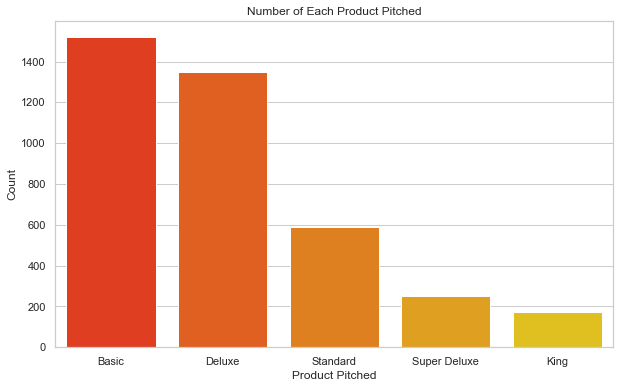

(None,
 Basic           1522
 Deluxe          1350
 Standard         588
 Super Deluxe     253
 King             175
 Name: ProductPitched, dtype: int64)

In [119]:
# Plotting the number of each product pitched
plt.figure(figsize=(10, 6))
product_count = df1['ProductPitched'].value_counts()
sns.barplot(x=product_count.index, y=product_count.values, palette='autumn')
plt.title('Number of Each Product Pitched')
plt.xlabel('Product Pitched')
plt.ylabel('Count')
plt.show(), product_count


### Plot Description:
The bar plot visualizes the count of each product type pitched to customers. The products are categorized as Basic, Deluxe, Standard, Super Deluxe, and King.


### Inference:

Basic and Deluxe products are the most frequently pitched, suggesting that these might be the core offerings of your agency, likely due to their broad appeal or profitability.
Standard, Super Deluxe, and King products are pitched less frequently, which could be due to higher costs, niche market appeal, or lower availability.
Understanding the frequency of pitches for each product can guide adjustments in marketing strategies to either boost underperforming product pitches or capitalize on the popularity of frequently pitched products.

##  Conversion Rate for Each Product Pitched

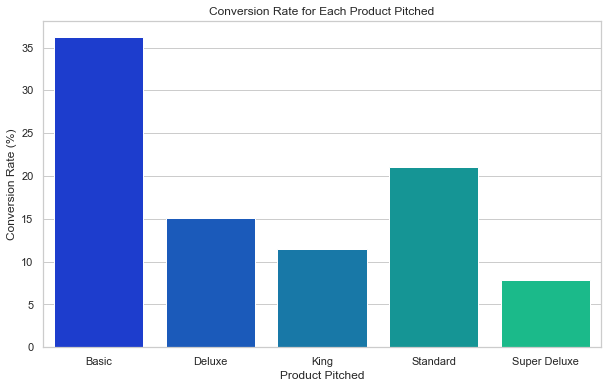

(None,
 ProductPitched
 Basic           36.268068
 Deluxe          15.111111
 King            11.428571
 Standard        21.088435
 Super Deluxe     7.905138
 Name: ProdTaken, dtype: float64)

In [120]:
plt.figure(figsize=(10, 6))
conversion_rate = df1.groupby('ProductPitched')['ProdTaken'].mean() * 100
sns.barplot(x=conversion_rate.index, y=conversion_rate.values, palette='winter')
plt.title('Conversion Rate for Each Product Pitched')
plt.xlabel('Product Pitched')
plt.ylabel('Conversion Rate (%)')
plt.show(), conversion_rate

### Plot Description:
This bar plot shows the conversion rate, which is the percentage of pitches that resulted in a product purchase, for each product category.



### Inference:

The Basic product has the highest conversion rate at approximately 36.26%, indicating strong customer interest and potentially good alignment with customer needs or budget.
Deluxe and Standard products have moderate conversion rates of about 15.11% and 21.08%, respectively.
Super Deluxe and King products exhibit lower conversion rates at 7.90% and 11.42%, suggesting that these higher-end products might be less appealing to the general customer base or could require more targeted marketing strategies.
The data on conversion rates can help in understanding the effectiveness of current sales strategies and in identifying areas for improvement, especially for high-end products with lower conversion rates.

## Product Preference by Gender

<Figure size 864x576 with 0 Axes>

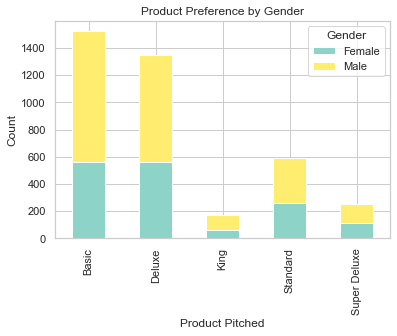

(None,
 Gender          Female  Male
 ProductPitched              
 Basic              561   961
 Deluxe             559   791
 King                62   113
 Standard           258   330
 Super Deluxe       117   136)

In [43]:
plt.figure(figsize=(12, 8))
product_gender = df1.groupby(['ProductPitched', 'Gender']).size().unstack(fill_value=0)
product_gender.plot(kind='bar', stacked=True, colormap='Set3')
plt.title('Product Preference by Gender')
plt.xlabel('Product Pitched')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show(), product_gender

### Plot Description:
The stacked bar plot displays the number of each product pitched, segmented by gender

### Inference:

Basic and Deluxe products are popular across all genders, with males showing a particularly strong preference for the Basic product.
King, Standard, and Super Deluxe products, while less frequently pitched overall, show a pattern where males again dominate the customer base, except for the Super Deluxe product where the distribution is relatively more balanced between males and females.
This visualization aids in understanding which products are favored by which gender, potentially guiding product development and marketing campaigns tailored to the distinct preferences of male and female customers.


## Customer Engagement

### Average Pitch Duration by Product Purchase Status

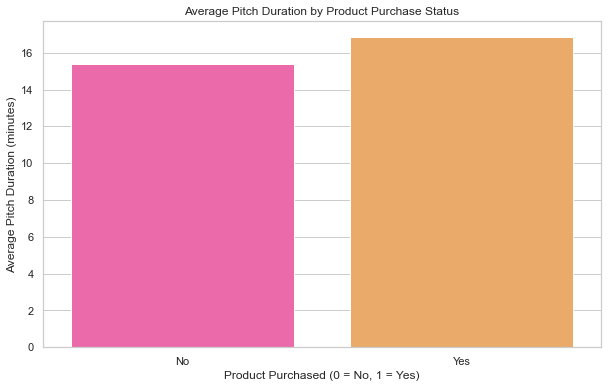

(None,
 ProdTaken
 0    15.363922
 1    16.873143
 Name: DurationOfPitch, dtype: float64)

In [121]:
plt.figure(figsize=(10, 6))
average_pitch_duration = df1.groupby('ProdTaken')['DurationOfPitch'].mean()
sns.barplot(x=average_pitch_duration.index, y=average_pitch_duration.values, palette='spring')
plt.title('Average Pitch Duration by Product Purchase Status')
plt.xlabel('Product Purchased (0 = No, 1 = Yes)')
plt.ylabel('Average Pitch Duration (minutes)')
plt.xticks([0, 1], ['No', 'Yes'])  # Ensuring x-axis is categorical
plt.show(), average_pitch_duration


### Plot Description:
This bar plot shows the average duration of sales pitches, compared between customers who did not purchase a product (0) and those who did (1)

### Inference:

The average pitch duration for customers who purchased a product is slightly higher (about 16.87 minutes) than for those who did not (about 15.17 minutes).
This suggests that a longer engagement during the pitch might contribute positively towards the likelihood of a sale, possibly due to better explanation of benefits, stronger relationship building, or more thorough handling of objections.
The data indicates that investing time in customer interactions can enhance the probability of closing sales. Tailoring the depth and duration of pitches based on customer interest and engagement could therefore be a valuable strategy.


## Pitch Satisfaction Score by Product Purchase Status

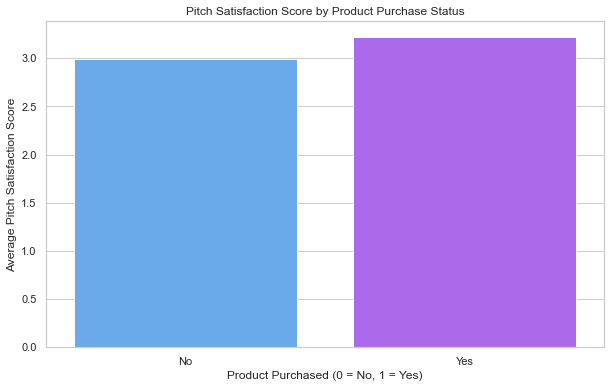

(None,
 ProdTaken
 0    2.993598
 1    3.223913
 Name: PitchSatisfactionScore, dtype: float64)

In [122]:
plt.figure(figsize=(10, 6))
satisfaction_score_purchase = df1.groupby('ProdTaken')['PitchSatisfactionScore'].mean()
sns.barplot(x=satisfaction_score_purchase.index, y=satisfaction_score_purchase.values, palette='cool')
plt.title('Pitch Satisfaction Score by Product Purchase Status')
plt.xlabel('Product Purchased (0 = No, 1 = Yes)')
plt.ylabel('Average Pitch Satisfaction Score')
plt.xticks([0, 1], ['No', 'Yes'])  # Ensuring x-axis is categorical
plt.show(), satisfaction_score_purchase

### Plot Description:
The bar plot compares the average pitch satisfaction scores between customers who did not purchase a product (0) and those who did (1).

### Inference:

There is a slight difference in the average satisfaction scores: customers who purchased a product reported a higher satisfaction score (about 3.22) compared to those who did not purchase (about 3.04).
While the difference is not substantial, it indicates that higher satisfaction with the sales pitch correlates with a greater likelihood of purchasing. This suggests that the quality of the pitch, including how it addresses customer needs and expectations, is crucial.
This insight highlights the importance of quality interactions during the pitch process, as higher satisfaction is associated with better sales outcomes. It emphasizes the need for well-trained and effective sales staff who can enhance customer satisfaction and drive conversions.

### Chi-square test

In [74]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(data['Gender'], data['ProdTaken'])

# Perform the Chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print("Contingency Table:")
print(contingency_table.to_string())

# Print chi-square statistic
print("\nChi-square Statistic:", chi2)

# Print p-value
print("P-value:", p_value)

# Print degrees of freedom
print("Degrees of Freedom:", dof)

# Print expected frequencies
print("Expected Frequencies:")
print(pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns).to_string())


Contingency Table:
ProdTaken     0    1
Gender              
Female     1630  342
Male       2338  578

Chi-square Statistic: 4.5703930088223
P-value: 0.03252910196963086
Degrees of Freedom: 1
Expected Frequencies:
ProdTaken            0           1
Gender                            
Female     1600.837971  371.162029
Male       2367.162029  548.837971


In [138]:
data= pd.read_csv('Travel.csv')
data['Gender'] = data['Gender'].replace('Fe Male', 'Female')
df2 = data.copy()
# Handle missing values: Check the proportion of missing data per column to decide on an appropriate strategy
missing_data = df.isnull().sum() / len(df)
missing_data_filtered = missing_data[missing_data > 0]
missing_data_filtered

Age                         0.046236
TypeofContact               0.005115
DurationOfPitch             0.051350
NumberOfFollowups           0.009206
PreferredPropertyStar       0.005319
NumberOfTrips               0.028642
NumberOfChildrenVisiting    0.013502
MonthlyIncome               0.047668
dtype: float64

In [139]:
from sklearn.impute import SimpleImputer

# Imputers for categorical and numeric data
categorical_imputer = SimpleImputer(strategy='most_frequent')
numeric_imputer = SimpleImputer(strategy='median')

# Columns to impute
categorical_columns = ['TypeofContact', 'PreferredPropertyStar']
numeric_columns = ['Age', 'DurationOfPitch', 'NumberOfFollowups', 'NumberOfTrips', 'NumberOfChildrenVisiting', 'MonthlyIncome']

# Impute categorical data
df2[categorical_columns] = categorical_imputer.fit_transform(data[categorical_columns])

# Impute numeric data
df2[numeric_columns] = numeric_imputer.fit_transform(data[numeric_columns])

# Verify no more missing values
df2.isnull().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

C:\Users\VIGNES~1\AppData\Local\Temp/ipykernel_11140/2542786321.py:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\VIGNES~1\AppData\Local\Temp/ipykernel_11140/2542786321.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



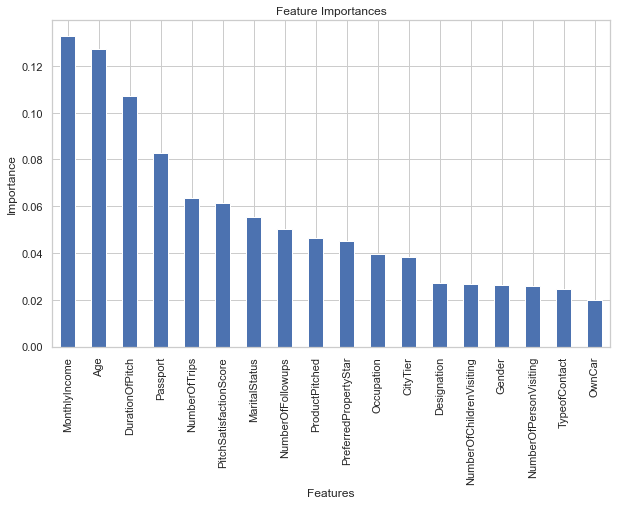

In [140]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Prepare the data
X = df2.drop(['CustomerID', 'ProdTaken'], axis=1)  # drop non-predictive and target variable
y = df2['ProdTaken']

# Converting categorical variables to type 'category' to handle without encoding
for column in X.select_dtypes(include=['object']).columns:
    X[column] = X[column].astype('category')

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)# Convert categorical variables into numeric codes
for column in X_train.select_dtypes(include=['category']).columns:
    X_train[column] = X_train[column].cat.codes
    X_test[column] = X_test[column].cat.codes

# Re-fit the RandomForestClassifier
rf.fit(X_train, y_train)

# Extract feature importance again
feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_importances
import matplotlib.pyplot as plt

# Plot feature importances
plt.figure(figsize=(10, 6))
feature_importances.plot(kind='bar')
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()


In [141]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score, accuracy_score

# Selecting relevant features
features = [
    'MonthlyIncome', 'Age', 'DurationOfPitch', 'Passport',
    'NumberOfTrips', 'PitchSatisfactionScore', 'MaritalStatus',
    'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar'
]
target = 'ProdTaken'

# Prepare the dataset
X = df2[features]
y = df2[target]

# Handle categorical data and missing values
X['MaritalStatus'] = LabelEncoder().fit_transform(X['MaritalStatus'])
X['ProductPitched'] = LabelEncoder().fit_transform(X['ProductPitched'])
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


C:\Users\VIGNES~1\AppData\Local\Temp/ipykernel_11140/2298331170.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\VIGNES~1\AppData\Local\Temp/ipykernel_11140/2298331170.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



((3421, 10), (1467, 10), (3421,), (1467,))

In [137]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Initialize classifiers
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier(random_state=42)
gb = GradientBoostingClassifier(random_state=42)

# Train and predict with each model
def train_predict_evaluate(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    accuracy = accuracy_score(y_test, predictions)
    return mae, r2, accuracy

from sklearn.metrics import confusion_matrix
import seaborn as sns

# Function to plot confusion matrix
def plot_confusion_matrix(cm, labels):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    
# Evaluate KNN
knn_mae, knn_r2, knn_accuracy = train_predict_evaluate(knn, X_train, X_test, y_train, y_test)
print("KNN MAE:", knn_mae)
print("KNN R2 Score:", knn_r2)
print("KNN Accuracy:", knn_accuracy)

# Evaluate Decision Tree
dt_mae, dt_r2, dt_accuracy = train_predict_evaluate(dt, X_train, X_test, y_train, y_test)
print("\nDecision Tree MAE:", dt_mae)
print("Decision Tree R2 Score:", dt_r2)
print("Decision Tree Accuracy:", dt_accuracy)

# Evaluate Gradient Boosting
gb_mae, gb_r2, gb_accuracy = train_predict_evaluate(gb, X_train, X_test, y_train, y_test)
print("\nGradient Boosting MAE:", gb_mae)
print("Gradient Boosting R2 Score:", gb_r2)
print("Gradient Boosting Accuracy:", gb_accuracy)


KNN MAE: 0.1301976823449216
KNN R2 Score: 0.1428191212731199
KNN Accuracy: 0.8698023176550784

Decision Tree MAE: 0.09406952965235174
Decision Tree R2 Score: 0.38067559547481955
Decision Tree Accuracy: 0.9059304703476483

Gradient Boosting MAE: 0.1445126107702795
Gradient Boosting R2 Score: 0.0485741031932011
Gradient Boosting Accuracy: 0.8554873892297206


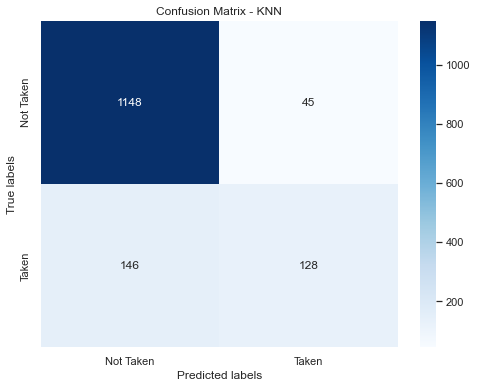

KNN MAE: 0.1301976823449216
KNN R2 Score: 0.1428191212731199
KNN Accuracy: 0.8698023176550784


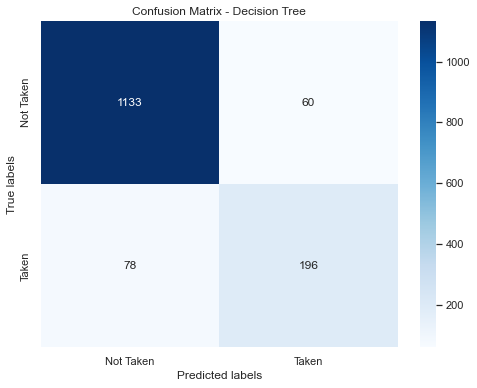


Decision Tree MAE: 0.09406952965235174
Decision Tree R2 Score: 0.38067559547481955
Decision Tree Accuracy: 0.9059304703476483


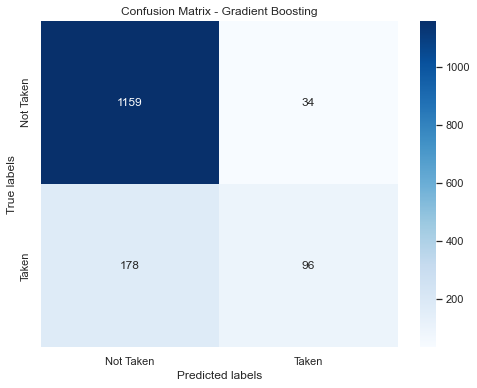


Gradient Boosting MAE: 0.1445126107702795
Gradient Boosting R2 Score: 0.0485741031932011
Gradient Boosting Accuracy: 0.8554873892297206


In [134]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Function to plot confusion matrix
def plot_confusion_matrix(cm, labels):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')

# Compute confusion matrix for KNN
knn_cm = confusion_matrix(y_test, knn.predict(X_test))
plot_confusion_matrix(knn_cm, labels=['Not Taken', 'Taken'])
plt.title('Confusion Matrix - KNN')
plt.show()
print("KNN MAE:", knn_mae)
print("KNN R2 Score:", knn_r2)
print("KNN Accuracy:", knn_accuracy)


# Compute confusion matrix for Decision Tree
dt_cm = confusion_matrix(y_test, dt.predict(X_test))
plot_confusion_matrix(dt_cm, labels=['Not Taken', 'Taken'])
plt.title('Confusion Matrix - Decision Tree')
plt.show()
print("\nDecision Tree MAE:", dt_mae)
print("Decision Tree R2 Score:", dt_r2)
print("Decision Tree Accuracy:", dt_accuracy)

# Compute confusion matrix for Gradient Boosting
gb_cm = confusion_matrix(y_test, gb.predict(X_test))
plot_confusion_matrix(gb_cm, labels=['Not Taken', 'Taken'])
plt.title('Confusion Matrix - Gradient Boosting')
plt.show()
print("\nGradient Boosting MAE:", gb_mae)
print("Gradient Boosting R2 Score:", gb_r2)
print("Gradient Boosting Accuracy:", gb_accuracy)


In [133]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Initialize classifiers
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier(random_state=42)
gb = GradientBoostingClassifier(random_state=42)

# Train and predict with each model
def train_predict_evaluate(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    accuracy = accuracy_score(y_test, predictions)
    return mae, r2, accuracy

# Evaluate KNN
knn_mae, knn_r2, knn_accuracy = train_predict_evaluate(knn, X_train, X_test, y_train, y_test)

# Evaluate Decision Tree
dt_mae, dt_r2, dt_accuracy = train_predict_evaluate(dt, X_train, X_test, y_train, y_test)

# Evaluate Gradient Boosting
gb_mae, gb_r2, gb_accuracy = train_predict_evaluate(gb, X_train, X_test, y_train, y_test)

knn_mae, knn_r2, knn_accuracy, dt_mae, dt_r2, dt_accuracy, gb_mae, gb_r2, gb_accuracy


(0.1301976823449216,
 0.1428191212731199,
 0.8698023176550784,
 0.09406952965235174,
 0.38067559547481955,
 0.9059304703476483,
 0.1445126107702795,
 0.0485741031932011,
 0.8554873892297206)